In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [7]:
df = pd.read_parquet("C:\\Users\\RDRL\\Downloads\\train_data.parquet")
df.head(5)

,id1,id2,id3,id4,id5,y,f1,f2,f3,f4,...,f357,f358,f359,f360,f361,f362,f363,f364,f365,f366
0,1366776_189706075_16-23_2023-11-02 22:22:00.042,1366776,189706075,2023-11-02 22:22:00.042,2023-11-02,0,1.0,None,None,None,...,None,-9999.0,0.0,None,28.0,0.0,0.0,337.0,0.0,0.0
1,1366776_89227_16-23_2023-11-01 23:51:24.999,1366776,89227,2023-11-01 23:51:24.999,2023-11-01,0,1.0,None,None,None,...,None,None,0.0,None,87.0,0.0,0.0,1010.0,2.0,0.0019801980198019
2,1366776_35046_16-23_2023-11-01 00:30:59.797,1366776,35046,2023-11-01 00:30:59.797,2023-11-01,0,1.0,None,None,None,...,None,None,0.0,None,23.0,0.0,0.0,1010.0,2.0,0.0019801980198019
3,1366776_6275451_16-23_2023-11-02 22:21:32.261,1366776,6275451,2023-11-02 22:21:32.261,2023-11-02,0,1.0,None,None,None,...,None,-9999.0,0.0,None,277.0,1.0,0.003610108303249,337.0,0.0,0.0
4,1366776_78053_16-23_2023-11-02 22:21:34.799,1366776,78053,2023-11-02 22:21:34.799,2023-11-02,0,1.0,None,None,None,...,None,-9999.0,0.0,None,359.0,0.0,0.0,337.0,0.0,0.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 770164 entries, 0 to 770163
Columns: 372 entries, id1 to f366
dtypes: object(372)
memory usage: 2.1+ GB


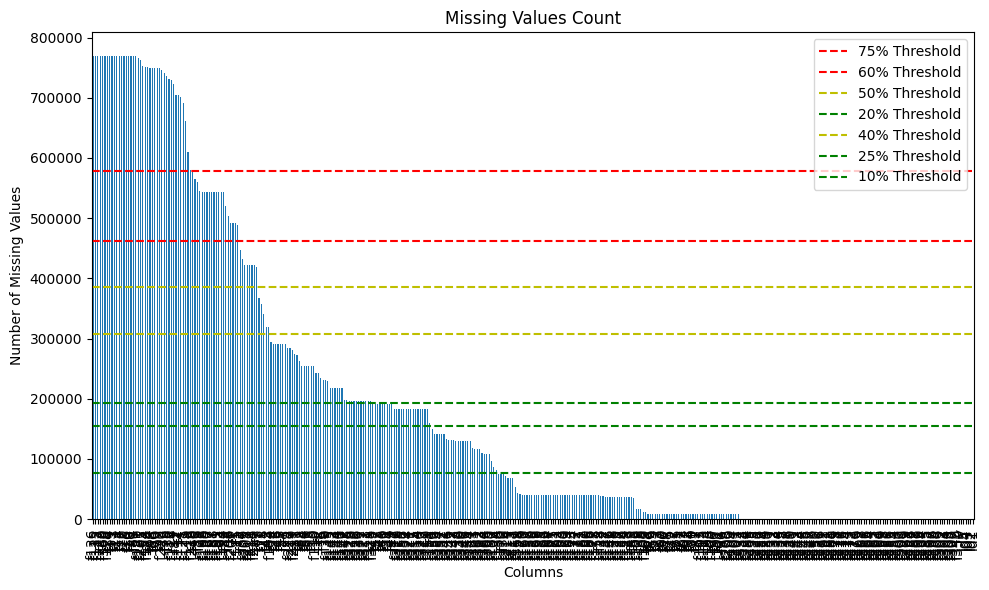

In [32]:
missing_value_count = df.isnull().sum().sort_values( ascending=False)
# plot for missing values
plt.figure(figsize=(10, 6))
missing_value_count.plot(kind='bar')
plt.axhline(y=0.75 * len(df), color='r', linestyle='--', label='75% Threshold')  # marking line for 75% missing values
plt.axhline(y=0.60 * len(df), color='r', linestyle='--', label='60% Threshold')  # marking line for 75% missing values
plt.axhline(y=0.50 * len(df), color='y', linestyle='--', label='50% Threshold')  # marking line for 50% missing values
plt.axhline(y=0.20* len(df), color='g', linestyle='--', label='20% Threshold')  # marking line for 75% missing values
plt.axhline(y=0.40 * len(df), color='y', linestyle='--', label='40% Threshold')  # marking line for 75% missing values
plt.axhline(y=0.25 * len(df), color='g', linestyle='--', label='25% Threshold')  # marking line for 50% missing values
plt.axhline(y=0.10 * len(df), color='g', linestyle='--', label='10% Threshold')  # marking line for 50% missing values
plt.legend()
plt.title('Missing Values Count')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [14]:
# features which have more than 75% missing values
features_to_drop = missing_value_count[missing_value_count > 0.75 * len(df)].index.tolist()
print("Features with more than 75% missing values:", features_to_drop)


Features with more than 75% missing values: ['f136', 'f135', 'f112', 'f122', 'f80', 'f360', 'f120', 'f34', 'f19', 'f13', 'f21', 'f14', 'f17', 'f20', 'f15', 'f16', 'f18', 'f84', 'f37', 'f189', 'f221', 'f205', 'f154', 'f176', 'f64', 'f88', 'f66', 'f70', 'f92', 'f220', 'f33', 'f79', 'f36', 'f118', 'f114', 'f81', 'f117', 'f4', 'f121', 'f3', 'f119', 'f116', 'f218']


In [15]:
# Load the dataset of data dictionary
data_dictionary = pd.read_csv("C:\\Users\\RDRL\\Downloads\\data_dictionary.csv")

In [16]:
data_dictionary.head()

,masked_column,Description,Type
0,id1,Primary Key(masked),Key
1,id2,Customer ID (masked),-
2,id3,Offer ID,Categorical
3,id4,Event timestamp,Numerical
4,id5,Event Date,Numerical


In [35]:
def print_feature_details(features_to_drop, data_dictionary):
    for feature in features_to_drop:
        feature_info = data_dictionary[data_dictionary['masked_column'] == feature]
        if not feature_info.empty:
            for _, row in feature_info.iterrows():
                print(f"ID: {row['masked_column']}\nDescription: {row['Description']}\nType: {row['Type']}\nMissing Values: {missing_value_count[feature]}\n{'-'*60}")
        else:
            print(f"ID: {feature} - No information available in data dictionary.\n{'-'*60}")

In [36]:
# features which have more than 75% missing values
missing_value_count = missing_value_count.sort_values(ascending=False)
features_to_drop = missing_value_count[missing_value_count > 0.75 * len(df)].index.tolist()
print("Features with more than 75% missing values and their details:\n")

print_feature_details(features_to_drop, data_dictionary)

Features with more than 75% missing values and their details:

ID: f136
Description: CTR in last 60 days for offer type retail
Type: Numerical
Missing Values: 770164
------------------------------------------------------------
ID: f135
Description: CTR for last 60 days  for offer type business expenses
Type: Numerical
Missing Values: 770164
------------------------------------------------------------
ID: f112
Description: If offer type Insurance then ctr in last 180 days
Type: Numerical
Missing Values: 770164
------------------------------------------------------------
ID: f122
Description: Ratio of ctr in the last 90 days to the ctr in last 180 days for offer type Insurance
Type: Numerical
Missing Values: 770164
------------------------------------------------------------
ID: f80
Description: Ratio of no of times estatement page is viewed in last 30 days to estatement page viewed in last 180 days
Type: Numerical
Missing Values: 770086
--------------------------------------------------

In [37]:
# print the feature details with no missing values 
features_imp = missing_value_count[missing_value_count == 0].index.tolist()
print("Features with no missing values and their details:\n")
print_feature_details(features_imp, data_dictionary)

Features with no missing values and their details:

ID: f349
Description: context variable fetched in real time where 1 for Monday, 2 for Tuesday,…………, 7 for Sunday
Type: Categorical
Missing Values: 0
------------------------------------------------------------
ID: f350
Description: context variable fetched in real time where this is Number of seconds after 00:00 hrs 
Type: Numerical
Missing Values: 0
------------------------------------------------------------
ID: y
Description: Dependent Variable
Type: Label
Missing Values: 0
------------------------------------------------------------
ID: id5
Description: Event Date
Type: Numerical
Missing Values: 0
------------------------------------------------------------
ID: id4
Description: Event timestamp
Type: Numerical
Missing Values: 0
------------------------------------------------------------
ID: id3
Description: Offer ID
Type: Categorical
Missing Values: 0
------------------------------------------------------------
ID: id2
Description

In [38]:
# print the feature details with 50000 missing values sorted by count
missing_value_count = missing_value_count.sort_values(ascending=True)
features_imp = missing_value_count[missing_value_count < 50000].index.tolist()
print("Features with less than 50000 missing values and their details:\n")
print_feature_details(features_imp, data_dictionary)

Features with less than 50000 missing values and their details:

ID: id1
Description: Primary Key(masked)
Type: Key
Missing Values: 0
------------------------------------------------------------
ID: id2
Description: Customer ID (masked)
Type: -
Missing Values: 0
------------------------------------------------------------
ID: id3
Description: Offer ID
Type: Categorical
Missing Values: 0
------------------------------------------------------------
ID: id4
Description: Event timestamp
Type: Numerical
Missing Values: 0
------------------------------------------------------------
ID: id5
Description: Event Date
Type: Numerical
Missing Values: 0
------------------------------------------------------------
ID: y
Description: Dependent Variable
Type: Label
Missing Values: 0
------------------------------------------------------------
ID: f350
Description: context variable fetched in real time where this is Number of seconds after 00:00 hrs 
Type: Numerical
Missing Values: 0
------------------

In [25]:
test_df = pd.read_parquet(r"C:\Users\RDRL\Desktop\AmEx 25\data\test_data.parquet")

In [26]:
test_df.head()

,id1,id2,id3,id4,id5,f1,f2,f3,f4,f5,...,f357,f358,f359,f360,f361,f362,f363,f364,f365,f366
46756,1362907_91950_16-23_2023-11-04 18:56:26.000794,1362907,91950,2023-11-04 18:56:26.000794,2023-11-04,None,None,None,None,None,...,0.0027807272790246,0.0465999838670646,0.0,None,1.0,0.0,0.0,56.0,0.0,0.0
57819,1082599_88356_16-23_2023-11-04 06:08:53.373,1082599,88356,2023-11-04 06:08:53.373,2023-11-04,None,9.0,None,None,None,...,0.0014287946777398,0.0603093514970909,0.0,None,195.0,13.0,0.0666666666666666,None,None,None
15390,1888466_958700_16-23_2023-11-05 10:07:28.000725,1888466,958700,2023-11-05 10:07:28.000725,2023-11-05,None,None,None,None,22.0,...,-0.0174961119751166,0.0734836702954899,0.0,None,155.0,67.0,0.432258064516129,1142.0,436.0,0.3817863397548161
145730,1888971_795739_16-23_2023-11-04 12:25:28.244,1888971,795739,2023-11-04 12:25:28.244,2023-11-04,None,None,None,None,None,...,0.0013159476327096,0.040572039549215,0.0,None,None,None,None,None,None,None
146085,1256369_82296_16-23_2023-11-05 06:45:26.657,1256369,82296,2023-11-05 06:45:26.657,2023-11-05,None,None,None,None,None,...,0.0020541699799278,0.038243539079214,0.0,None,29.0,2.0,0.0689655172413793,361.0,3.0,0.0083102493074792


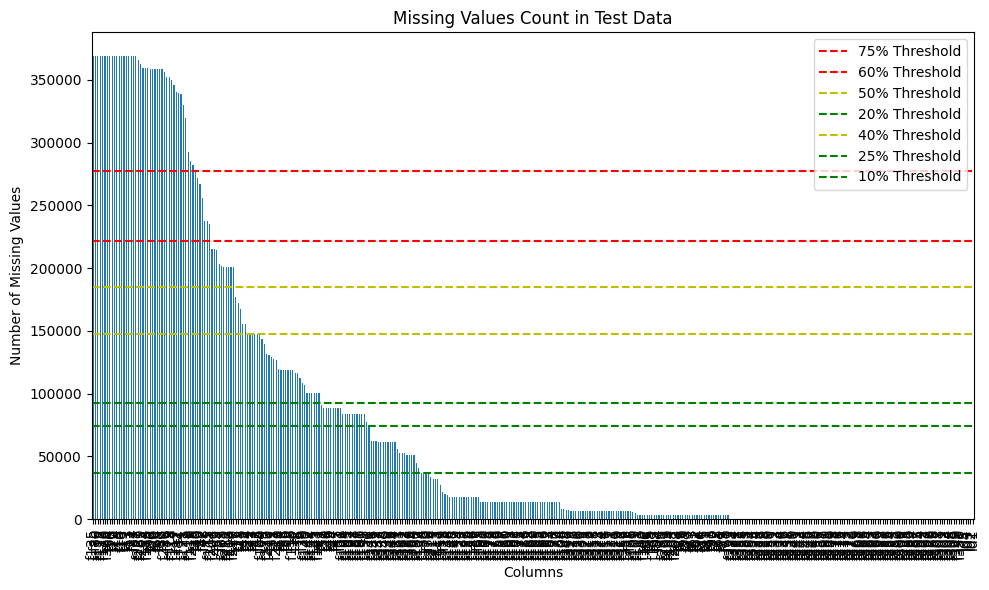

In [56]:
missing_value_count_test = test_df.isnull().sum().sort_values( ascending=False)
# plot for missing values in test data
plt.figure(figsize=(10, 6))
missing_value_count_test.plot(kind='bar')
plt.axhline(y=0.75 * len(test_df), color='r', linestyle='--', label='75% Threshold')  # marking line for 75% missing values
plt.axhline(y=0.60 * len(test_df), color='r', linestyle='--', label='60% Threshold')  # marking line for 75% missing values
plt.axhline(y=0.50 * len(test_df), color='y', linestyle='--', label='50% Threshold')  # marking line for 50% missing values
plt.axhline(y=0.20* len(test_df), color='g', linestyle='--', label='20% Threshold')  # marking line for 75% missing values
plt.axhline(y=0.40 * len(test_df), color='y', linestyle='--', label='40% Threshold')  # marking line for 75% missing values
plt.axhline(y=0.25 * len(test_df), color='g', linestyle='--', label='25% Threshold')  # marking line for 50% missing values
plt.axhline(y=0.10 * len(test_df), color='g', linestyle='--', label='10% Threshold')  # marking line for 50% missing values
plt.legend()
plt.title('Missing Values Count in Test Data')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [39]:
df.columns

Index(['id1', 'id2', 'id3', 'id4', 'id5', 'y', 'f1', 'f2', 'f3', 'f4',
       ...
       'f357', 'f358', 'f359', 'f360', 'f361', 'f362', 'f363', 'f364', 'f365',
       'f366'],
      dtype='object', length=372)

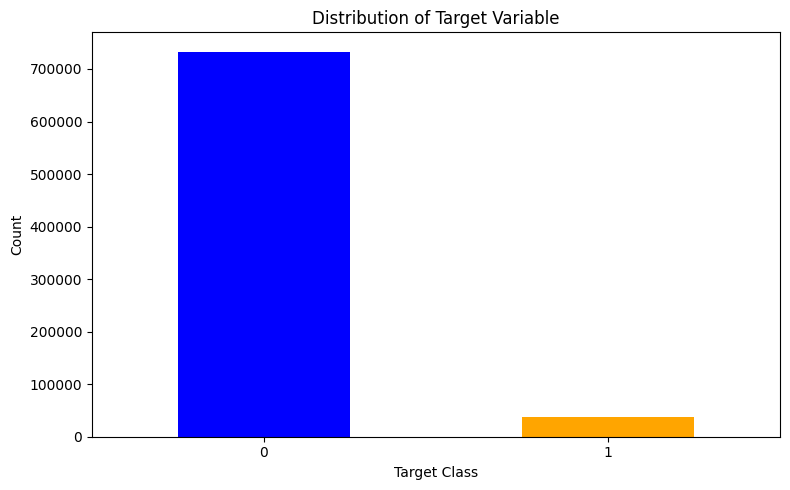

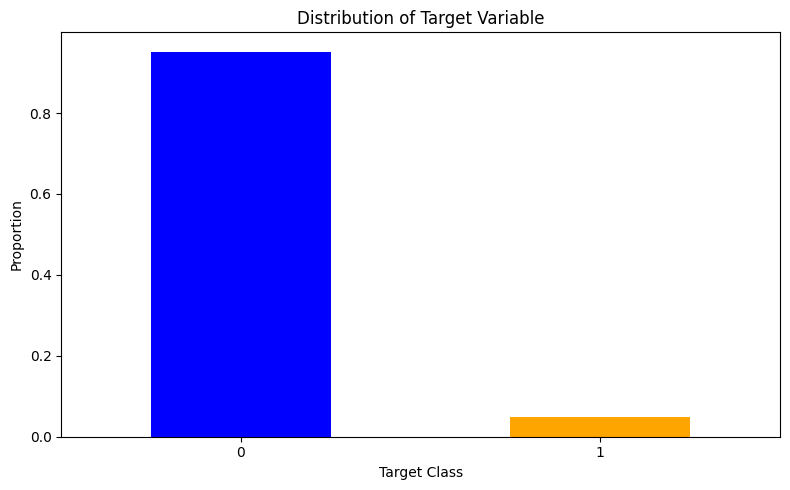

In [42]:
# Distribution of the y variable
y_distribution = df['y'].value_counts()
plt.figure(figsize=(8, 5))
y_distribution.plot(kind='bar', color=['blue', 'orange'])
plt.title('Distribution of Target Variable')
plt.xlabel('Target Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Normalized distribution of the y variable
y_distribution = df['y'].value_counts(normalize=True)
plt.figure(figsize=(8, 5))
y_distribution.plot(kind='bar', color=['blue', 'orange'])
plt.title('Distribution of Target Variable')
plt.xlabel('Target Class')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [47]:
df.sample(10)

,id1,id2,id3,id4,id5,y,f1,f2,f3,f4,...,f357,f358,f359,f360,f361,f362,f363,f364,f365,f366
266795,1246077_153757225_16-23_2023-11-01 10:18:39.920,1246077,153757225,2023-11-01 10:18:39.920,2023-11-01,0,5.0,None,None,None,...,None,None,0.0,None,1.0,0.0,0.0,None,None,None
76040,1475869_80893_16-23_2023-11-02 05:07:54.633,1475869,80893,2023-11-02 05:07:54.633,2023-11-02,0,None,29.0,None,29.0,...,None,None,0.0,None,62.0,0.0,0.0,1382.0,0.0,0.0
621605,1351768_96930_16-23_2023-11-01 14:16:31.317,1351768,96930,2023-11-01 14:16:31.317,2023-11-01,0,None,None,None,None,...,0.0089107675063181,0.0611537087241149,None,None,15.0,1.0,0.0666666666666666,73.0,2.0,0.0273972602739726
674479,1111137_1392_16-23_2023-11-01 11:50:06.018,1111137,1392,2023-11-01 11:50:06.018,2023-11-01,0,None,None,None,None,...,0.0005435313168003,0.0490842918588583,0.0,None,5.0,0.0,0.0,127.0,0.0,0.0
441646,1299678_35046_16-23_2023-11-02 10:16:13.879,1299678,35046,2023-11-02 10:16:13.879,2023-11-02,0,None,46.0,None,None,...,None,None,0.0,None,5.0,1.0,0.2,139.0,2.0,0.014388489208633
740804,1330793_2304_16-23_2023-11-02 04:28:53.133,1330793,2304,2023-11-02 04:28:53.133,2023-11-02,0,29.0,37.0,44.0,None,...,None,None,0.0,None,100.0,6.0,0.06,560.0,7.0,0.0125
234468,1848488_87102_16-23_2023-11-01 07:22:21.000230,1848488,87102,2023-11-01 07:22:21.000230,2023-11-01,1,5.0,42.0,None,None,...,None,None,0.0,None,242.0,8.0,0.0330578512396694,2532.0,110.0,0.0434439178515007
481092,1000835_204400_16-23_2023-11-01 07:39:21.847,1000835,204400,2023-11-01 07:39:21.847,2023-11-01,0,25.0,None,None,None,...,0.0002735071770241,0.0749727391552387,0.0,None,None,None,None,463.0,21.0,0.0453563714902807
614585,1348237_67681_16-23_2023-11-01 05:36:16.250,1348237,67681,2023-11-01 05:36:16.250,2023-11-01,0,None,None,None,None,...,None,None,0.0,None,25.0,1.0,0.04,1246.0,35.0,0.0280898876404494
361122,1236343_89227_16-23_2023-11-01 18:53:55.000013,1236343,89227,2023-11-01 18:53:55.000013,2023-11-01,1,None,None,None,None,...,None,None,0.0,None,45.0,0.0,0.0,268.0,6.0,0.0223880597014925


In [ ]:
# Rearrange the features in ascending order of missing values in a new DataFrame
sorted_columns = missing_value_count.sort_values(ascending=True).index.tolist()
df_sorted = df[sorted_columns]
df_sorted.sample(10)

,id1,id2,id3,id4,id5,y,f350,f349,f307,f306,...,f19,f14,f34,f120,f360,f80,f112,f122,f136,f135
464657,1153837_88933_16-23_2023-11-03 11:00:35.306,1153837,88933,2023-11-03 11:00:35.306,2023-11-03,0,39545,6,0.0,0.0,...,None,None,None,None,None,None,None,None,None,None
461051,1123298_367870583_16-23_2023-11-02 08:38:51.294,1123298,367870583,2023-11-02 08:38:51.294,2023-11-02,0,30965,5,0.0,0.0,...,None,None,None,None,None,None,None,None,None,None
307938,1362453_33452_16-23_2023-11-02 11:08:32.080,1362453,33452,2023-11-02 11:08:32.080,2023-11-02,0,40015,5,0.0,0.0,...,None,None,None,None,None,None,None,None,None,None
127734,1288206_689367_16-23_2023-11-03 07:26:03.472,1288206,689367,2023-11-03 07:26:03.472,2023-11-03,0,26763,6,0.0,0.0,...,None,None,None,None,None,None,None,None,None,None
209223,1357737_56483_16-23_2023-11-03 11:29:12.603,1357737,56483,2023-11-03 11:29:12.603,2023-11-03,0,41337,6,0.0,0.0,...,None,None,None,None,None,None,None,None,None,None
357458,1412521_93527_16-23_2023-11-03 08:39:46.830,1412521,93527,2023-11-03 08:39:46.830,2023-11-03,0,31137,6,0.0,0.0,...,None,None,None,None,None,None,None,None,None,None
524405,1489744_24840_16-23_2023-11-01 20:25:50.887,1489744,24840,2023-11-01 20:25:50.887,2023-11-01,0,73536,4,0.0,0.0,...,None,None,None,None,None,None,None,None,None,None
633289,1751822_84457_16-23_2023-11-02 03:48:44.988,1751822,84457,2023-11-02 03:48:44.988,2023-11-02,0,13656,5,0.0,0.0,...,None,None,None,None,None,None,None,None,None,None
129303,1810897_29593_16-23_2023-11-03 06:11:45.956,1810897,29593,2023-11-03 06:11:45.956,2023-11-03,0,22301,6,0.0,0.0,...,None,None,None,None,None,None,None,None,None,None
224228,1035510_98283_16-23_2023-11-03 09:48:27.061,1035510,98283,2023-11-03 09:48:27.061,2023-11-03,0,35292,6,0.0,0.0,...,None,None,None,None,None,None,None,None,None,None


In [53]:
df.shape

(770164, 372)

In [52]:
df_sorted.sample(10)

,id1,id2,id3,id4,id5,y,f350,f349,f307,f306,...,f19,f14,f34,f120,f360,f80,f112,f122,f136,f135
181191,1310981_399752_16-23_2023-11-02 09:36:58.671,1310981,399752,2023-11-02 09:36:58.671,2023-11-02,0,34600,5,0.0,0.0,...,None,None,None,None,None,None,None,None,None,None
440405,1882953_88456737_16-23_2023-11-02 09:35:58.775,1882953,88456737,2023-11-02 09:35:58.775,2023-11-02,0,34421,5,0.0,0.0,...,None,None,None,None,None,None,None,None,None,None
497769,1433999_91943_16-23_2023-11-03 10:04:51.280,1433999,91943,2023-11-03 10:04:51.280,2023-11-03,0,36265,6,0.0,0.0,...,None,None,None,None,None,None,None,None,None,None
331618,1413659_633765_16-23_2023-11-03 21:02:55.000298,1413659,633765,2023-11-03 21:02:55.000298,2023-11-03,1,75699,6,0.0,0.0,...,None,None,None,None,None,None,None,None,None,None
245748,1598082_6275451_16-23_2023-11-01 05:19:50.605,1598082,6275451,2023-11-01 05:19:50.605,2023-11-01,0,19190,4,0.0,0.0,...,None,None,None,None,None,None,None,None,None,None
534190,1056427_7706453_16-23_2023-11-01 11:10:42.214,1056427,7706453,2023-11-01 11:10:42.214,2023-11-01,0,40185,4,0.0,0.0,...,None,None,None,None,None,None,None,None,None,None
401149,1423168_29416_16-23_2023-11-02 20:01:27.455,1423168,29416,2023-11-02 20:01:27.455,2023-11-02,0,72066,5,0.0,0.0,...,None,None,None,None,None,None,None,None,None,None
272031,1544710_86311_16-23_2023-11-02 13:53:08.437,1544710,86311,2023-11-02 13:53:08.437,2023-11-02,0,49965,5,0.0,0.0,...,None,None,None,None,None,None,None,None,None,None
368426,1066553_567335_16-23_2023-11-03 13:38:07.814,1066553,567335,2023-11-03 13:38:07.814,2023-11-03,0,49032,6,0.0,0.0,...,None,None,None,None,None,None,None,None,None,None
52714,1877397_3223664_16-23_2023-11-01 08:47:23.132,1877397,3223664,2023-11-01 08:47:23.132,2023-11-01,0,31518,4,0.0,0.0,...,None,None,None,None,None,None,None,None,None,None


In [50]:
print_feature_details(sorted_columns,data_dictionary)

ID: id1
Description: Primary Key(masked)
Type: Key
Missing Values: 0
------------------------------------------------------------
ID: id2
Description: Customer ID (masked)
Type: -
Missing Values: 0
------------------------------------------------------------
ID: id3
Description: Offer ID
Type: Categorical
Missing Values: 0
------------------------------------------------------------
ID: id4
Description: Event timestamp
Type: Numerical
Missing Values: 0
------------------------------------------------------------
ID: id5
Description: Event Date
Type: Numerical
Missing Values: 0
------------------------------------------------------------
ID: y
Description: Dependent Variable
Type: Label
Missing Values: 0
------------------------------------------------------------
ID: f350
Description: context variable fetched in real time where this is Number of seconds after 00:00 hrs 
Type: Numerical
Missing Values: 0
------------------------------------------------------------
ID: f349
Description: 

In [73]:
# rearranging in ascending order of missing values less than 25%
sorted_columns = missing_value_count[missing_value_count < 0.25 * len(df)].sort_values(ascending=True).index.tolist()
df_25 = df[sorted_columns]

In [98]:
def impute_missing_values(df, strategy='median'):
    df_imputed = df.copy()
    for column in df_imputed.columns:
        if df_imputed[column].isnull().any():
            if df_imputed[column].dtype == 'float64':
                if strategy == 'mean':
                    df_imputed[column].fillna(df_imputed[column].mean(), inplace=True)
                elif strategy == 'median':
                    df_imputed[column].fillna(df_imputed[column].median(), inplace=True)
            # elif str(df_imputed[column].dtype) in ['category', 'object']:
            #     df_imputed[column].fillna(df_imputed[column].mode()[0], inplace=True)
    return df_imputed

In [75]:
# converting the column of df to respective dtypes as mentioned in the data dictionary
def convert_column_types(df, data_dictionary):
    type_map = {
        'Numerical': 'float64',
        'Categorical': 'category',
        'Key': 'category',
        'Label': 'category',
        'One hot encoded': 'category',
        '-': 'object',
    }
    for column in df.columns:
        if column in data_dictionary['masked_column'].values:
            dtype = data_dictionary.loc[data_dictionary['masked_column'] == column, 'Type'].iloc[0]
            if dtype in type_map:
                try:
                    df[column] = df[column].astype(type_map[dtype])
                except Exception as e:
                    print(f"Could not convert {column} to {type_map[dtype]}: {e}")
    return df

In [77]:
df_25 = convert_column_types(df_25,data_dictionary)

C:\Users\RDRL\AppData\Local\Temp\ipykernel_28296\4006871157.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].astype(type_map[dtype])
C:\Users\RDRL\AppData\Local\Temp\ipykernel_28296\4006871157.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].astype(type_map[dtype])
C:\Users\RDRL\AppData\Local\Temp\ipykernel_28296\4006871157.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

Could not convert id4 to float64: could not convert string to float: '2023-11-02 22:22:00.042'
Could not convert id5 to float64: could not convert string to float: '2023-11-02'


C:\Users\RDRL\AppData\Local\Temp\ipykernel_28296\4006871157.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].astype(type_map[dtype])
C:\Users\RDRL\AppData\Local\Temp\ipykernel_28296\4006871157.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].astype(type_map[dtype])
C:\Users\RDRL\AppData\Local\Temp\ipykernel_28296\4006871157.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

In [89]:
df_25.dtypes.value_counts()

float64     160
category     48
category     36
object        3
category      2
category      1
category      1
category      1
category      1
category      1
Name: count, dtype: int64

In [95]:
def print_object_columns(df):
    dtype_groups = {}
    for col in df.columns:
        dtype_str = str(df[col].dtype)
        dtype_groups.setdefault(dtype_str, []).append(col)
    for dtype, cols in dtype_groups.items():
        print(f"\nColumns with dtype '{dtype}' ({len(cols)} columns):")
        for col in cols:
            print(f"  - {col}")

In [96]:
print_object_columns(df_25)


Columns with dtype 'category' (91 columns):
  - id1
  - id3
  - y
  - f349
  - f307
  - f306
  - f282
  - f281
  - f275
  - f276
  - f277
  - f278
  - f279
  - f292
  - f294
  - f293
  - f267
  - f268
  - f269
  - f270
  - f271
  - f272
  - f266
  - f265
  - f258
  - f257
  - f264
  - f263
  - f262
  - f261
  - f260
  - f259
  - f301
  - f300
  - f253
  - f254
  - f255
  - f256
  - f237
  - f228
  - f238
  - f273
  - f274
  - f280
  - f247
  - f233
  - f239
  - f240
  - f241
  - f248
  - f235
  - f234
  - f242
  - f236
  - f252
  - f291
  - f246
  - f245
  - f244
  - f243
  - f250
  - f249
  - f289
  - f290
  - f251
  - f302
  - f309
  - f308
  - f299
  - f298
  - f297
  - f285
  - f232
  - f231
  - f230
  - f229
  - f227
  - f226
  - f283
  - f284
  - f286
  - f287
  - f288
  - f296
  - f295
  - f303
  - f304
  - f305
  - f354
  - f50
  - f52

Columns with dtype 'object' (3 columns):
  - id2
  - id4
  - id5

Columns with dtype 'float64' (160 columns):
  - f350
  - f224
  - f225
  - f

In [70]:
data_dictionary['Type'].unique()

array(['Key', '-', 'Categorical', 'Numerical', 'Label', 'One hot encoded'],
      dtype=object)

In [ ]:
# values count of each unique values in data_dictionary 
value_counts = data_dictionary['Type'].value_counts()
print("Unique values count in data dictionary:")
print(value_counts)


Unique values count in data dictionary:
Type
Numerical          273
One hot encoded     84
Categorical         12
Key                  1
-                    1
Label                1
Name: count, dtype: int64


In [ ]:
# Count the number of columns with missing values grouped by dtype in df_25 out of total columns of particular dtype
missing_cols = df_25.columns[df_25.isnull().any()]
dtype_counts = df_25[missing_cols].dtypes.value_counts()
print("Number of columns with missing values grouped by dtype in df_25:")
print(dtype_counts)

Number of columns with missing values grouped by dtype in df_25:
float64     159
category     48
category     36
category      2
category      1
Name: count, dtype: int64


In [88]:
df_25.dtypes.value_counts()

float64     160
category     48
category     36
object        3
category      2
category      1
category      1
category      1
category      1
category      1
Name: count, dtype: int64

In [99]:
df_25_imp = impute_missing_values(df_25, strategy='median')

MemoryError: Unable to allocate 940. MiB for an array with shape (160, 770164) and data type float64

In [58]:
# # Distribution of the all independent variable with both side data on axis one side real values and one side normalised data
# # make sure numeric data is plotted except all ids and y
# numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
# numeric_columns.remove('y')  # Exclude target variable
# for col in numeric_columns:
#     plt.figure(figsize=(10, 5))
#     plt.subplot(1, 2, 1)
#     df[col].plot(kind='hist', bins=30, color='blue', alpha=0.7)
#     plt.title(f'Distribution of {col}')
#     plt.xlabel(col)
#     plt.ylabel('Count')

#     plt.subplot(1, 2, 2)
#     df[col].value_counts(normalize=True).plot(kind='bar', color='orange', alpha=0.7)
#     plt.title(f'Normalized Distribution of {col}')
#     plt.xlabel(col)
#     plt.ylabel('Proportion')

#     plt.tight_layout()
#     plt.show()
    
    
        
        